In [6]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime as dt

# Performance of stocks over the last year

In [7]:
#Setting the end date to today
end = dt.datetime.now()
#Start date set to 1 year back
start = dt.datetime(end.year-1,end.month,end.day)

To find the performance of stocks over the last year, we can create a list with the stock names, for future looping.

In [9]:
stocks = ['TCS.NS','WIPRO.NS','INFY.NS','PERSISTENT.NS','COFORGE.NS','LT.NS','TECHM.NS','MPHASIS.NS','HCLTECH.NS','OFSS.NS']
#Using Yahoo Finance to grab the stock data
for stock in stocks:
    globals()[stock] =  web.DataReader(stock,'yahoo',start,end) 
    #The globals method sets the stock name to a global variable
df = pdr.get_data_yahoo(stocks, start, end)

# Segment Composition of Sector Stocks

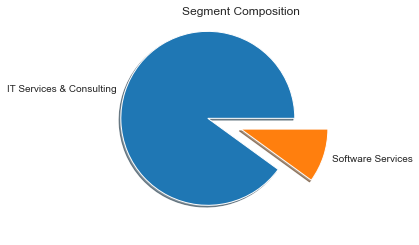

In [10]:
y = np.array([(9/10)*100, (1/10)*100])
mylabels = ["IT Services & Consulting", "Software Services"]
myexplode = [0.4, 0]
plt.title('Segment Composition')
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show() 

# Detailed Analysis of TCS stock

In [11]:
TCS = web.DataReader('TCS.NS','yahoo',start,end)

### Yahoo Finance Live Stock Data

In [12]:
TCS.describe()

,High,Low,Open,Close,Volume,Adj Close
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000
mean,3186.731123,3123.009243,3155.400002,3154.101010,3.077449e+06,3138.275583
std,326.610109,321.285895,322.654286,325.145063,1.828537e+06,333.413469
min,2655.000000,2600.050049,2604.000000,2604.600098,9.903100e+05,2581.365234
25%,2972.350098,2920.000000,2950.000000,2930.500000,1.986041e+06,2904.357666
50%,3177.000000,3122.850098,3154.550049,3144.550049,2.672752e+06,3134.409668
75%,3309.149902,3256.100098,3275.000000,3274.350098,3.646592e+06,3267.818359
max,3981.750000,3892.100098,3930.000000,3954.550049,1.983933e+07,3954.550049


### Adjusted Closing Price of TCS stock over a year

<AxesSubplot:xlabel='Date'>

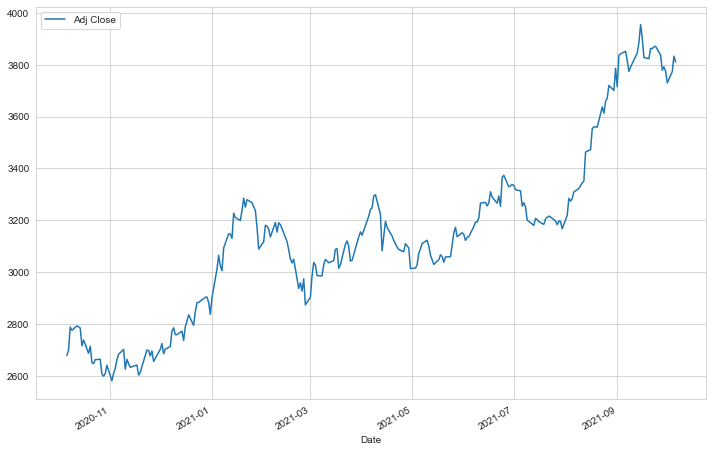

In [13]:
TCS['Adj Close'].plot(legend=True,figsize=(12,8))

We can see that the adjusted closing price has increased in 2021

### Volume of shares of TCS stock over a year

<AxesSubplot:xlabel='Date'>

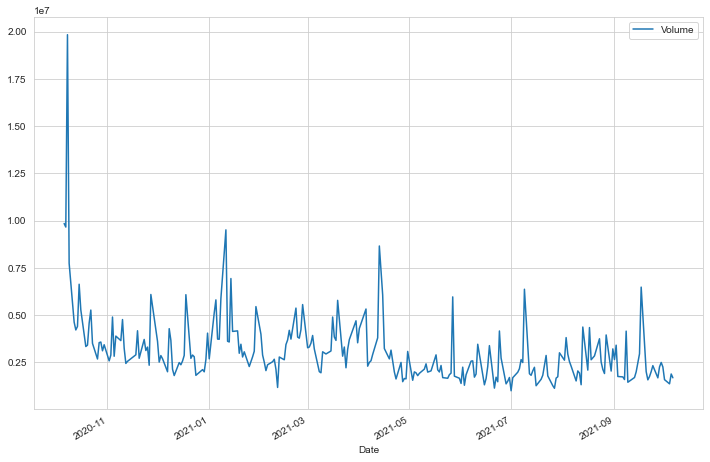

In [14]:
TCS['Volume'].plot(legend=True,figsize=(12,8))

We see that the volume of shares traded in a day has slowly decreased over time with some fluctuations

### Moving Average of TCS stock for 10, 20, and 50 days

We see the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

<AxesSubplot:xlabel='Date'>

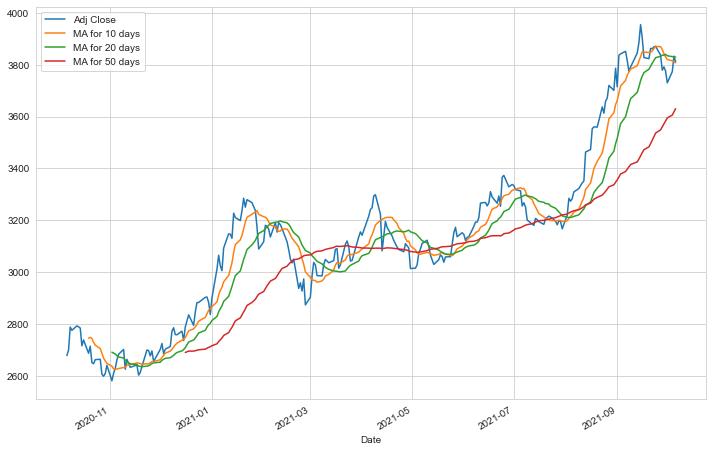

In [15]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    TCS[column_name] = TCS['Adj Close'].rolling(window=ma,center=False).mean()
    
TCS[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,8))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, TCS's stock has a slight dip near the start of March for the MAs of 10 and 20 days, the 50 day MA line shows that it has been on an upward trend since January.

### Daily Return Average of TCS stock over a year

In [16]:
#The daily return column can be created by using the percentage change over the adjusted closing price
TCS['Daily Return'] = TCS['Adj Close'].pct_change()
TCS['Daily Return']

Date
2020-10-06         NaN
2020-10-07    0.007976
2020-10-08    0.032804
2020-10-09   -0.004512
2020-10-12    0.006061
                ...   
2021-09-30   -0.004312
2021-10-01   -0.012012
2021-10-04    0.011554
2021-10-05    0.015901
2021-10-06   -0.005844
Name: Daily Return, Length: 249, dtype: float64

We plot the percentage change of daily returns to get an overview

<AxesSubplot:xlabel='Date'>

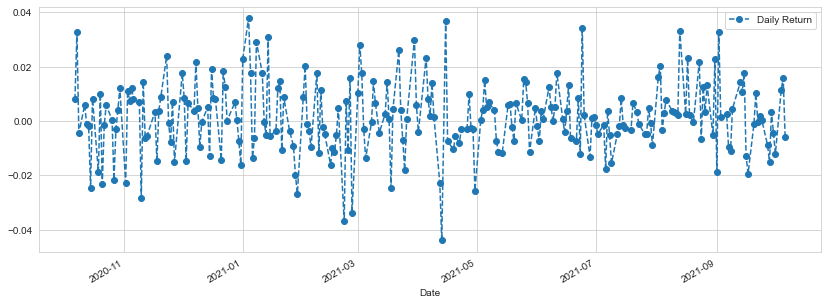

In [17]:
TCS['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

We plot the distplot with KDE (Kernel Density Estimate) and histogram with a bin size of 300

C:\Users\Adarshya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

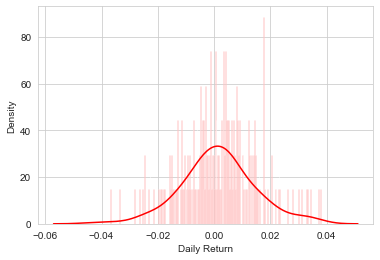

In [18]:
sns.distplot(TCS['Daily Return'].dropna(),bins=300,color='red')

We can see that peak of KDE is slightly to the right of 0.00, which means the number of samples in the histogram is more in more in number towards the right. Hence, positive daily returns are slightly more frequent than negative returns.

# Adjusted Closing Prices of IT stocks over time

<AxesSubplot:xlabel='Date'>

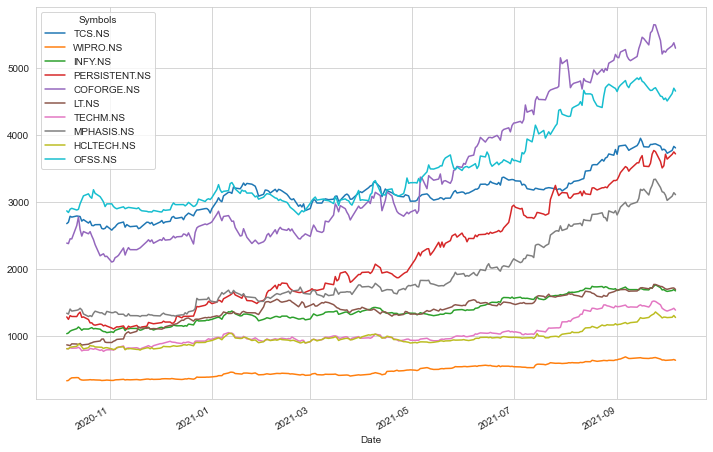

In [19]:
Adj = df['Adj Close']
Adj.plot(figsize=(12,8))

From the graph, it can be inferred that we've taken into account stocks that are from a variety of price ranges

# Market Capitalisation

To find the market value of the pool of stocks, we find the market cap

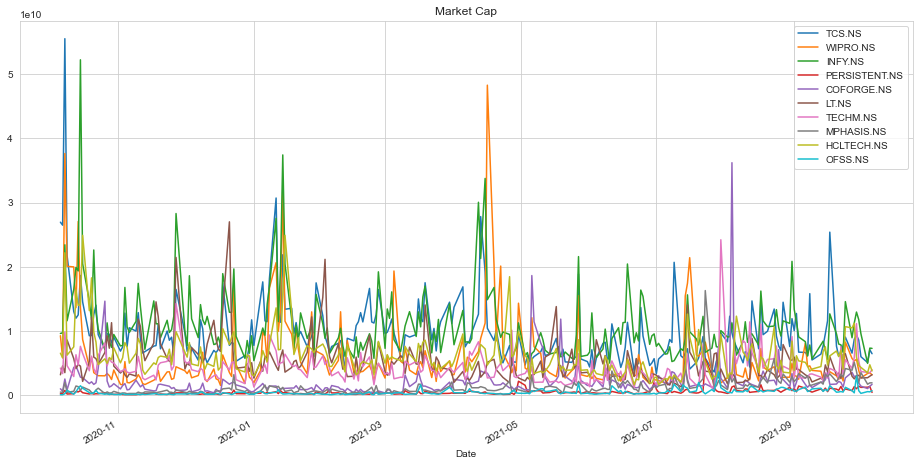

In [20]:
Open = df.Open
Volume=df.Volume
MarketCap = Open*Volume
MarketCap.plot(figsize=(16,8))
plt.title('Market Cap')
plt.legend()

We can see that Infosys and TCS have a greater Market Cap compared to Oracle or Persistent

In [21]:
m=[]
open_df_now = web.DataReader(stocks,'yahoo','2021-10-05','2021-10-05')['Open']
vol_df_now = web.DataReader(stocks,'yahoo','2021-10-05','2021-10-05')['Volume']
for stock in stocks:
    m.append(open_df_now[stock]*vol_df_now[stock])
print(m)

[Date
2021-10-05    7.049884e+09
Name: TCS.NS, dtype: float64, Date
2021-10-05    3.472518e+09
Name: WIPRO.NS, dtype: float64, Date
2021-10-05    7.307801e+09
Name: INFY.NS, dtype: float64, Date
2021-10-05    1.324256e+09
Name: PERSISTENT.NS, dtype: float64, Date
2021-10-05    1.367128e+09
Name: COFORGE.NS, dtype: float64, Date
2021-10-05    2.923637e+09
Name: LT.NS, dtype: float64, Date
2021-10-05    3.472321e+09
Name: TECHM.NS, dtype: float64, Date
2021-10-05    1.889244e+09
Name: MPHASIS.NS, dtype: float64, Date
2021-10-05    4.712099e+09
Name: HCLTECH.NS, dtype: float64, Date
2021-10-05    4.917473e+08
Name: OFSS.NS, dtype: float64]


We have found the Market Cap value of each stock for today

# Correlation between pool of stocks

To see the actual numbers for the correlation coefficients, we can use seaborn's heatmap.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

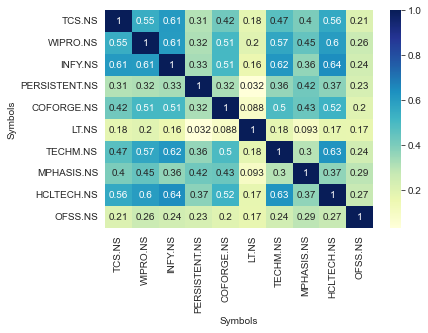

In [22]:
close_df = web.DataReader(stocks,'yahoo',start,end)['Adj Close']
rets_df = close_df.pct_change()
sns.heatmap(rets_df.corr(), cmap="YlGnBu",annot=True)

HCL and Infosys seem to have the highest correlation of value 0.64. But another interesting thing to note is that all companies that we explored are positively correlated. This means that the stocks always move the same direction by the same amount.

# How much value do we put at risk by investing in a particular stock?

### Return vs. Risk

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

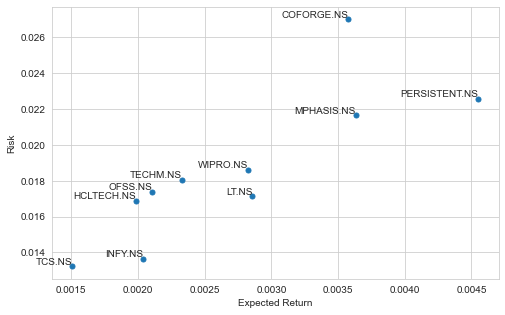

In [23]:
rets = rets_df.dropna()
plt.figure(figsize=(8,5))

#We are finding the Expected Return by calculating the mean of daily return
#And we are calculating risk by finding the standard deviation of daily return
#Plotting scatter plot between expected return and risk for each stock
plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(0,0),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    )

We'd want a stock to have a high expected return and a low risk; L&T seem to be the safe option for that. We can see that while Coforge and Mphasis have the same return, Coforge has significantly higher risk than Mphasis.

### Using Monte Carlo Method

A Monte Carlo simulation is an attempt to predict the future many times over and aggregate the results in the end for some quantifiable value. 

In [24]:
days = 365

#delta t
dt = 1/365

#Expected Daily Return
mu = rets.mean()['TCS.NS']
#Risk
sigma = rets.std()['TCS.NS']

#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        
        #shock = loc(drift) = mean of daily returns/time period, scale(Standard deviation) = SD*root(1/time period)
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        #drift = mean of daily returns/time period
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        #ΔS = S × (μΔt + σϵ√Δt)
        #Price = S + ΔS
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

To get opening value of TCS stock

In [25]:
TCS['Open'].head()

Date
2020-10-06    2736.0
2020-10-07    2742.0
2020-10-08    2800.0
2020-10-09    2810.0
2020-10-12    2815.5
Name: Open, dtype: float64

We do simulation of 100 runs, and plot them. At the end of the simulation, thousands or millions of "random trials" produce a distribution of outcomes of prices that can be analyzed. 

Text(0.5, 1.0, 'Monte Carlo Analysis for TCS')

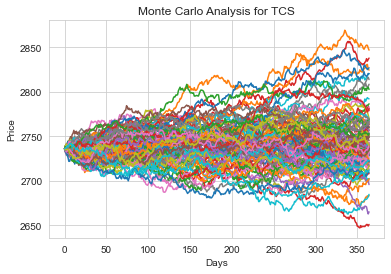

In [26]:
start_price = 2736.0 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for TCS')

To calculate the value at risk (VaR) of a portfolio, we can run a Monte Carlo simulation that attempts to predict the worst likely loss for a portfolio.

Text(0.5, 1.0, 'Final price distribution for TCS Stock after 365 days')

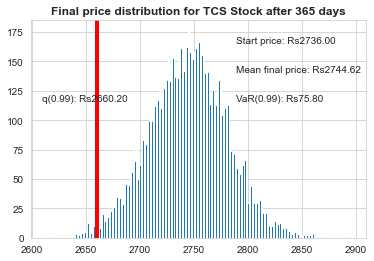

In [27]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: Rs%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: Rs%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): Rs%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): Rs%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for TCS Stock after %s days" %days, weight='bold')

TCS's stock is pretty stable. 
The starting price (open price of last year) that we had was INR2736.00, and the average final price over 10,000 runs was INR2744.62.
The red line indicates the value of stock at risk at the desired confidence interval. (We take the first percentile for q, which means, the confidence level would be 99%)
For every stock, we'd be risking INR75.80, 99% of the time.

# Equal Weightage Strategy

## Portfolio Return

Initially, we explore Equal Weightage Strategy for our portfolio

In [28]:
#Assigning 10% weight to each stock
initial_weight = np.array([0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10])

#We have the daily stock prices in our dataframe and we calculate average return for each stock
Mean = df['Adj Close'].pct_change().mean()
Mean

Symbols
TCS.NS           0.001509
WIPRO.NS         0.002826
INFY.NS          0.002038
PERSISTENT.NS    0.004552
COFORGE.NS       0.003578
LT.NS            0.002857
TECHM.NS         0.002329
MPHASIS.NS       0.003634
HCLTECH.NS       0.001983
OFSS.NS          0.002106
dtype: float64

Persistent seems to be the best performer when equaly weighted

In [29]:
#We can compute total portfolio return by calculating the sum of the weighted daily returns using np
allocated_daily_returns = (initial_weight * Mean)
portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)

0.002741271449296989


The average daily portfolio return is around 0.274% based on our initial allocation

In [30]:
return_stocks = df['Adj Close'].pct_change()
return_stocks['portfolio_daily_returns'] = return_stocks.dot(initial_weight)
return_stocks.tail(5)

Symbols,TCS.NS,WIPRO.NS,INFY.NS,PERSISTENT.NS,COFORGE.NS,LT.NS,TECHM.NS,MPHASIS.NS,HCLTECH.NS,OFSS.NS,portfolio_daily_returns
Date,,,,,,,,,,,
2021-09-30,-0.004312,-0.010379,-0.010075,0.048987,-0.003688,-0.010488,-0.010571,-0.012956,-0.001288,0.004919,-0.000985
2021-10-01,-0.012012,0.003391,-0.005999,-0.019657,0.007288,-0.003553,-0.006772,-0.025174,-0.004533,-0.009592,-0.007661
2021-10-04,0.011554,0.007544,0.008167,0.019502,0.011071,0.010814,0.020274,0.020768,0.003847,0.024378,0.013792
2021-10-05,0.015901,0.009048,0.008369,0.009894,0.008327,0.000845,0.010007,0.016898,0.020725,0.017481,0.011750
2021-10-06,-0.005844,-0.017160,-0.011372,-0.007904,-0.014975,-0.012611,-0.019391,-0.009455,-0.022756,-0.009100,-0.013057


We are returning the dataframe of the daily returns of our portfolio by date

In [31]:
#We are calculating the cumulative returns of the portfolio by using cumprod, 

cumulative_returns_daily = (1+return_stocks).cumprod()
cumulative_returns_daily.tail(5)

Symbols,TCS.NS,WIPRO.NS,INFY.NS,PERSISTENT.NS,COFORGE.NS,LT.NS,TECHM.NS,MPHASIS.NS,HCLTECH.NS,OFSS.NS,portfolio_daily_returns
Date,,,,,,,,,,,
2021-09-30,1.409489,1.925543,1.621091,2.894570,2.195012,1.966803,1.704758,2.317567,1.583087,1.587629,1.927714
2021-10-01,1.392559,1.932072,1.611366,2.837672,2.211010,1.959815,1.693213,2.259224,1.575911,1.572401,1.912946
2021-10-04,1.408649,1.946648,1.624527,2.893012,2.235489,1.981008,1.727540,2.306145,1.581973,1.610733,1.939329
2021-10-05,1.431048,1.964261,1.638123,2.921636,2.254104,1.982683,1.744827,2.345114,1.614760,1.638889,1.962115
2021-10-06,1.422686,1.930554,1.619495,2.898542,2.220349,1.957679,1.710994,2.322942,1.578014,1.623975,1.936496


We are returning the dataframe of cumulative product of the values seen so far. The biggest driver of the return was Persistent with a cumulative return of around 289%.

<AxesSubplot:xlabel='Date'>

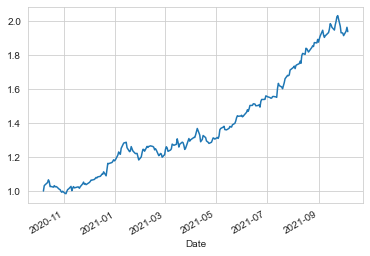

In [33]:
cumulative_returns_daily['portfolio_daily_returns'].plot()

We see overall that the portfolio is doing well

## Portfolio Risk

We calculate portfolio risk using standard deviation and variance using np.

In [34]:
#We calculate daily covariance
matrix_covariance_portfolio = return_stocks.iloc[:,:-1]

#Annualizing daily covariance by multiplying it with the number of trading days in a year(252 days)
matrix_covariance_portfolio = (matrix_covariance_portfolio.cov())*252

matrix_covariance_portfolio

Symbols,TCS.NS,WIPRO.NS,INFY.NS,PERSISTENT.NS,COFORGE.NS,LT.NS,TECHM.NS,MPHASIS.NS,HCLTECH.NS,OFSS.NS
Symbols,,,,,,,,,,
TCS.NS,0.044041,0.033802,0.027647,0.023159,0.037978,0.010259,0.028168,0.028871,0.031425,0.011950
WIPRO.NS,0.033802,0.087200,0.038723,0.033767,0.064386,0.015756,0.048041,0.045441,0.047471,0.021193
INFY.NS,0.027647,0.038723,0.046883,0.025654,0.047127,0.009313,0.038320,0.027024,0.037263,0.014395
PERSISTENT.NS,0.023159,0.033767,0.025654,0.128326,0.049572,0.003132,0.037008,0.052313,0.035797,0.022459
COFORGE.NS,0.037978,0.064386,0.047127,0.049572,0.183879,0.010261,0.061036,0.063854,0.060321,0.023369
LT.NS,0.010259,0.015756,0.009313,0.003132,0.010261,0.073958,0.014148,0.008685,0.012683,0.012743
TECHM.NS,0.028168,0.048041,0.038320,0.037008,0.061036,0.014148,0.082040,0.029743,0.048258,0.019085
MPHASIS.NS,0.028871,0.045441,0.027024,0.052313,0.063854,0.008685,0.029743,0.118177,0.033815,0.027621
HCLTECH.NS,0.031425,0.047471,0.037263,0.035797,0.060321,0.012683,0.048258,0.033815,0.071895,0.020167


The above table shows the covariance matrix of our portfolio

In [35]:
#We calculate portfolio covariance by doing matrix multiplication using dot product function in np
portfolio_variance = np.dot(initial_weight.T,np.dot(matrix_covariance_portfolio, initial_weight))

#We calculate standard deviation which indicates the risk of our portfolio
portfolio_risk = np.sqrt(portfolio_variance)
print("We find that, the risk of the portfolio under equal weightage strategy using matrix operations is around", round(portfolio_risk*100,2),"%")

We find that, the risk of the portfolio under equal weightage strategy using matrix operations is around 19.23 %


# Portfolio Optimization through differential weightage

Portfolio optimization is the process to identify the best possible portfolio from a set of portfolios. We have implemented the Sharpe Ratio Approach.

 The Sharpe ratio of a portfolio helps investors to understand the return of a portfolio based on the level of risk taken.

Text(0.5, 1.0, 'Sharpe Ratio for random portfolios')

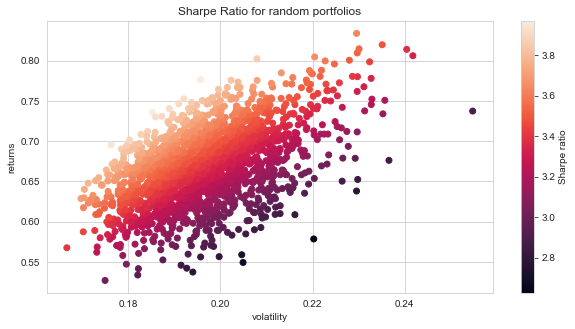

In [36]:
#Daily return
return_stocks = df['Close'].pct_change()

#We generate 2000 random portfolios with different weights
number_of_portfolios = 2000

#Defining empty lists where we will append calculated portfolio returns, risk and Sharpe Ratio for each of the random portfolios. 
RF = 0
portfolio_returns = []
portfolio_risk = []
sharpe_ratio_port = []
portfolio_weights = []

for portfolio in range (number_of_portfolios):
    #generate a w random weight of lengt of number of stocks
    weights = np.random.random_sample((len(stocks)))
    weights = weights / np.sum(weights)
    portfolio_weights.append(weights)
    
    #Calculating the annualised portfolio returns, risk and Sharpe Ratio.
    annualize_return = np.sum((return_stocks.mean() * weights) * 252)
    portfolio_returns.append(annualize_return)
    
    #variance
    matrix_covariance_portfolio = (return_stocks.cov())*252
    portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance_portfolio, weights))
    portfolio_standard_deviation= np.sqrt(portfolio_variance) 
    portfolio_risk.append(portfolio_standard_deviation)
    
    #sharpe_ratio
    sharpe_ratio = ((annualize_return- RF)/portfolio_standard_deviation)
    sharpe_ratio_port.append(sharpe_ratio)

#Converting list into numpy arrays
portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratio_port = np.array(sharpe_ratio_port)

#Visualize using scatter plot in matplotlib
plt.figure(figsize=(10, 5))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolio_returns / portfolio_risk) 
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe ratio')
plt.title('Sharpe Ratio for random portfolios')

In the graph, each point represents a portfolio. We see that portfolios with the higher Sharpe Ratio are shown as orange. Orange coloured portfolios are preferable since they offer better risk adjusted returns.

## Identifying the best portfolio

In [37]:
#We consider the metrics: return, risk, sharpe ratio, and weights
porfolio_metrics = [portfolio_returns,portfolio_risk,sharpe_ratio_port, portfolio_weights] 

#from Python list we create a Pandas DataFrame
portfolio_dfs = pd.DataFrame(porfolio_metrics)
portfolio_dfs = portfolio_dfs.T

#Rename the columns:
portfolio_dfs.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']

#convert from object to float the first three columns.
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_dfs[col] = portfolio_dfs[col].astype(float)
    
portfolio_dfs.head(5)

,Port Returns,Port Risk,Sharpe Ratio,Portfolio Weights
0,0.684529,0.189690,3.608675,"[0.1389989788424395, 0.02128261902102063, 0.11..."
1,0.741591,0.194309,3.816546,"[0.023316642555830505, 0.027970513942071454, 0..."
2,0.650159,0.194176,3.348299,"[0.060889662480669626, 0.020006534368373845, 0..."
3,0.704364,0.205007,3.435799,"[0.15268720869421196, 0.15646336796486815, 0.0..."
4,0.626903,0.185034,3.388037,"[0.0680230256484258, 0.1632337432766457, 0.162..."


By looking into the DataFrame, we see that each row represents a different portfolio. For example, row 0 contains a portfolio with 13.8% weight in TCS, 13.6% in Wipro, etc. 

### Finding portfolio with the highest returns and Sharpe Ratio and minimum risk

In [58]:
#Portfolio with the highest Sharpe Ratio can be found using idmax
Highest_sharpe_port = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]

#Portfolio with the minimum risk can be found using idxmin
min_risk = portfolio_dfs.iloc[portfolio_dfs['Port Risk'].idxmin()]

#Highest_sharpe_port
print("Highest Sharpe Ratio")
print(Highest_sharpe_port)
print("")

print("Minimum Risk")
print(min_risk)
print("")

Highest Sharpe Ratio
Port Returns                                                  0.735413
Port Risk                                                     0.185309
Sharpe Ratio                                                  3.968571
Portfolio Weights    [0.18957396182909517, 0.01659462248582555, 0.0...
Name: 272, dtype: object

Minimum Risk
Port Returns                                                  0.567501
Port Risk                                                     0.166746
Sharpe Ratio                                                   3.40339
Portfolio Weights    [0.24001127967587332, 0.03954829364309111, 0.1...
Name: 515, dtype: object



We see the portfolio with the highest Sharpe Ratio as well as the portfolio with the minimum risk.

In [60]:
from tabulate import tabulate
print('Portfolio with highest sharpe ratio of',round(Highest_sharpe_port['Sharpe Ratio'],2), 'has a return of',
      round(Highest_sharpe_port['Port Returns']*100, 2), '% and risk of', round(Highest_sharpe_port['Port Risk']*100, 2),"%")
print("")
j=0
sharpe=[]
for i in stocks:
    sharpe.append([i,round(Highest_sharpe_port['Portfolio Weights'][j]*100,2)])
    j=j+1
  
# create header
head = ["Stock", "Weightage in %"]
  
# display table
print(tabulate(sharpe, headers=head, tablefmt="grid"))

Portfolio with highest sharpe ratio of 3.97 has a return of 73.54 % and risk of 18.53 %

+---------------+------------------+
| Stock         |   Weightage in % |
+===============+==================+
| TCS.NS        |            18.96 |
+---------------+------------------+
| WIPRO.NS      |             1.66 |
+---------------+------------------+
| INFY.NS       |             0.18 |
+---------------+------------------+
| PERSISTENT.NS |            21.02 |
+---------------+------------------+
| COFORGE.NS    |             3.32 |
+---------------+------------------+
| LT.NS         |            20.96 |
+---------------+------------------+
| TECHM.NS      |             6    |
+---------------+------------------+
| MPHASIS.NS    |            17.41 |
+---------------+------------------+
| HCLTECH.NS    |             2.11 |
+---------------+------------------+
| OFSS.NS       |             8.39 |
+---------------+------------------+


In [61]:
print('Portfolio with Minimum Risk of',round(min_risk['Port Risk']*100, 2),"% has a sharpe ratio of ",round(min_risk['Sharpe Ratio'],2), 'and a return of',
      round(min_risk['Port Returns']*100, 2), '%')
print("")
j=0
minrisk=[]
for i in stocks:
    minrisk.append([i,round(min_risk['Portfolio Weights'][j]*100,2)])
    j=j+1
  
# create header
headmin = ["Stock", "Weightage in %"]
  
# display table
print(tabulate(minrisk, headers=headmin, tablefmt="grid"))

Portfolio with Minimum Risk of 16.67 % has a sharpe ratio of  3.4 and a return of 56.75 %

+---------------+------------------+
| Stock         |   Weightage in % |
+===============+==================+
| TCS.NS        |            24    |
+---------------+------------------+
| WIPRO.NS      |             3.95 |
+---------------+------------------+
| INFY.NS       |            10.98 |
+---------------+------------------+
| PERSISTENT.NS |             3.47 |
+---------------+------------------+
| COFORGE.NS    |             2.6  |
+---------------+------------------+
| LT.NS         |            17.71 |
+---------------+------------------+
| TECHM.NS      |             5.52 |
+---------------+------------------+
| MPHASIS.NS    |             7.4  |
+---------------+------------------+
| HCLTECH.NS    |             6.89 |
+---------------+------------------+
| OFSS.NS       |            17.49 |
+---------------+------------------+
